## Docs

### Frequency Tokenizer

In [1]:
import tokenizers as tk

Read, preprocess then train

In [2]:
tokenizer = tk.FrequencyTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()

Reading the data ...
Splitting the data ...
Training FrequencyTokenizer...


Tokenize 

In [3]:
tokenizer.tokenize("السلام عليكم")

['السلام', 'عليكم']

Encode as ids

In [4]:
tokenizer.encode("السلام عليكم")

[536, 829]

Decode back to tokens

In [5]:
tokenizer.decode([536, 829])

['السلام', 'عليكم']

### SentencePiece Tokenizer

Read, preprocess then train

In [6]:
tokenizer = tk.SentencePieceTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()

Reading the data ...
Splitting the data ...
Training SentencePiece...


Tokenize 

In [7]:
tokenizer.tokenize("صباح الخير يا أصدقاء")

['▁صباح', '▁الخير', '▁يا', '▁أص', 'د', 'قاء']

Encode as ids

In [8]:
tokenizer.encode("صباح الخير يا أصدقاء")

[3777, 1424, 78, 423, 9962, 560]

Decode back to tokens

In [9]:
tokenizer.decode([3777, 1424, 78, 423, 9962, 560])

['▁صباح', '▁الخير', '▁يا', '▁أص', 'د', 'قاء']

### Auto Tokenizer

Read, preprocess then train

In [12]:
import tokenizers as tk
tokenizer = tk.AutoTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()

Reading the data ...
Splitting the data ...
Training AutoTokenizer...


Tokenize 

In [13]:
tokenizer.tokenize("السلام عليكم")

['ال', '##سلام', 'علي', '##كم']

Encode as ids

In [14]:
tokenizer.encode("السلام عليكم")

[2, 367, 764, 184]

Decode back to tokens

In [16]:
tokenizer.decode([2, 367, 764, 184])

['ال', '##سلام', 'علي', '##كم']

### Random Tokenizer

In [1]:
import tokenizers as tk
tokenizer = tk.RandomTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()

Reading the data ...
Splitting the data ...
Training RandomTokenizer ...


In [7]:
tokenizer.tokenize("السلام عليكم أيها الأصدقاء")

['ا', '##لسلام', 'علي', '##كم', 'أ', '##يها', 'ال', '##أصد', '##قاء']

### Large Files

We can use memory mapping to extract token's frequency for large files. It uses `mmap` to process chunks of the data at each iteration step. 

In [10]:
import tokenizers as tk

# initialize
tokenizer = tk.FrequencyTokenizer()
tokenizer.process_data('samples/data.txt')

# training 
tokenizer.train(large_file = True)

1it [00:00,  4.45it/s]

Reading the data ...
Splitting the data ...
Training FrequencyTokenizer...


1it [00:00,  4.41it/s]


### Tokenization vs Segmentation 

We can use tokenization to segment words using a pretrained dictionary. This makes segmentation very fast as compared to
using libraries like `farasa`.

In [1]:
import tokenizers as tk
import time

tokenizer = tk.AutoTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()

start_time = time.time()
out = tokenizer.tokenize(open('data/raw/train.txt').read(), cache = True)
end_time = time.time()
print(end_time - start_time)

Reading the data ...
Splitting the data ...
Training AutoTokenizer...
24.519357204437256


In [3]:
tokenizer = tk.FrequencyTokenizer(segment = True)
start_time = time.time()
tokenizer.process_data('samples/data.txt')
end_time = time.time()
print(end_time - start_time)

Initializing Farasa


/home/zaid/.local/lib/python3.8/site-packages/farasa/__base.py:43: UserWarning: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.
  warnings.warn(


Reading the data ...
Segmenting the data ...
Splitting the data ...
46.888957500457764


### Export Models

Models can be saved for deployment and reloading.

In [2]:
tokenizer = tk.FrequencyTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()
tokenizer.save_model('freq.pl')

Reading the data ...
Splitting the data ...
Training FrequencyTokenizer...
Saving as pickle file ...


load model without pretraining

In [3]:
tokenizer = tk.FrequencyTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.load_model('freq.pl')

Reading the data ...
Splitting the data ...
Loading as pickle file ...


### Benchmarking

In [4]:
def calc_time(fun):
    start_time = time.time()
    fun().train()
    return time.time() - start_time

Training FrequencyTokenizer...
Training SentencePiece...
Training RandomTokenizer ...
Training AutoTokenizer...


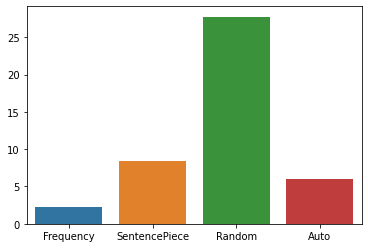

In [5]:
import tokenizers as tk
import time 
import seaborn as sns
import pandas as pd

running_times = {}

running_times['Frequency'] = calc_time(tk.FrequencyTokenizer)
running_times['SentencePiece'] = calc_time(tk.SentencePieceTokenizer)
running_times['Random'] = calc_time(tk.RandomTokenizer)
running_times['Auto'] = calc_time(tk.AutoTokenizer)

sns.barplot(data = pd.DataFrame.from_dict([running_times]))